In [1]:
from config import api_key
from yelpapi import YelpAPI
import requests
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
cities = ["Anaheim,CA", "Santa Ana,CA", "Irvine,CA", "Huntington Beach,CA", "Garden Grove,CA", "Orange,CA", "Fullerton,CA", "Costa Mesa,CA", "Mission Viejo,CA","Westminster,CA"]
url = "https://api.yelp.com/v3/businesses/search"
headers = {'Authorization': 'Bearer %s' %api_key}
price_locations = {}

for city in cities:
    locations={}
    params = {"term":"restaurant",
              "location":city,
              "limit":50,
             "radius":5000}
    responses=requests.get(url,headers = headers, params = params).json()
    for response in responses["businesses"]:
        try:
            money= response["price"]
            if money not in locations:
                locations[money]=1
                
            else:
                locations[money]+=1
        except KeyError:
            continue  
    price_locations[city]=locations 
    url_params = {"term":"restaurant",
                  "location":city,
                  "limit":50,
                 "offset":50,
                  "radius":5000}
    results = requests.get(url,headers = headers, params = url_params).json()
    for r in results["businesses"]:
        try:
            m = r["price"]
            if m not in locations:
                locations[m]=1
            else:
                locations[m]+=1
        except KeyError:
            continue
    price_locations[city]=locations
print(price_locations)        
     

{'Anaheim,CA': {'$$': 62, '$$$': 8, '$': 26, '$$$$': 3}, 'Santa Ana,CA': {'$$': 46, '$$$$': 1, '$': 51}, 'Irvine,CA': {'$$': 65, '$$$': 2, '$': 33}, 'Huntington Beach,CA': {'$$': 70, '$': 24, '$$$': 4}, 'Garden Grove,CA': {'$$': 46, '$': 50, '$$$$': 2, '$$$': 1}, 'Orange,CA': {'$$': 54, '$': 43, '$$$$': 2, '$$$': 1}, 'Fullerton,CA': {'$$': 59, '$': 36, '$$$': 2}, 'Costa Mesa,CA': {'$$': 67, '$': 28, '$$$': 3, '$$$$': 1}, 'Mission Viejo,CA': {'$': 41, '$$': 56, '$$$': 2}, 'Westminster,CA': {'$': 55, '$$': 44}}


In [3]:
columns = ["Cheap","Affordable","Expensive","Luxury"]
DF=pd.DataFrame.from_dict(price_locations).T #.T means transpose, switch columns and rows
DF = DF.reset_index()
# df.rename(columns = {'index':'City','$':'Cheap'}, inplace = True)
df = DF.rename(columns={"$":"Cheap","$$":"Affordable","$$$":"Expensive","$$$$":"Luxury","index":"City"})
# DF.to_csv("output.csv")

df = df.fillna(0)
df

,City,Cheap,Affordable,Expensive,Luxury
0,"Anaheim,CA",26.0,62.0,8.0,3.0
1,"Costa Mesa,CA",28.0,67.0,3.0,1.0
2,"Fullerton,CA",36.0,59.0,2.0,0.0
3,"Garden Grove,CA",50.0,46.0,1.0,2.0
4,"Huntington Beach,CA",24.0,70.0,4.0,0.0
5,"Irvine,CA",33.0,65.0,2.0,0.0
6,"Mission Viejo,CA",41.0,56.0,2.0,0.0
7,"Orange,CA",43.0,54.0,1.0,2.0
8,"Santa Ana,CA",51.0,46.0,0.0,1.0
9,"Westminster,CA",55.0,44.0,0.0,0.0


In [4]:
df['Totals'] = df.sum(axis=1)
df

,City,Cheap,Affordable,Expensive,Luxury,Totals
0,"Anaheim,CA",26.0,62.0,8.0,3.0,99.0
1,"Costa Mesa,CA",28.0,67.0,3.0,1.0,99.0
2,"Fullerton,CA",36.0,59.0,2.0,0.0,97.0
3,"Garden Grove,CA",50.0,46.0,1.0,2.0,99.0
4,"Huntington Beach,CA",24.0,70.0,4.0,0.0,98.0
5,"Irvine,CA",33.0,65.0,2.0,0.0,100.0
6,"Mission Viejo,CA",41.0,56.0,2.0,0.0,99.0
7,"Orange,CA",43.0,54.0,1.0,2.0,100.0
8,"Santa Ana,CA",51.0,46.0,0.0,1.0,98.0
9,"Westminster,CA",55.0,44.0,0.0,0.0,99.0


In [5]:
df['$'] = df['Cheap'] * 1
df['$$'] = df['Affordable'] * 2
df['$$$'] = df['Expensive'] * 3
df['$$$$'] = df['Luxury'] * 4

In [6]:
df['Cost'] = df['$'] + df['$$'] + df['$$$'] +df['$$$$']
df

,City,Cheap,Affordable,Expensive,Luxury,Totals,$,$$,$$$,$$$$,Cost
0,"Anaheim,CA",26.0,62.0,8.0,3.0,99.0,26.0,124.0,24.0,12.0,186.0
1,"Costa Mesa,CA",28.0,67.0,3.0,1.0,99.0,28.0,134.0,9.0,4.0,175.0
2,"Fullerton,CA",36.0,59.0,2.0,0.0,97.0,36.0,118.0,6.0,0.0,160.0
3,"Garden Grove,CA",50.0,46.0,1.0,2.0,99.0,50.0,92.0,3.0,8.0,153.0
4,"Huntington Beach,CA",24.0,70.0,4.0,0.0,98.0,24.0,140.0,12.0,0.0,176.0
5,"Irvine,CA",33.0,65.0,2.0,0.0,100.0,33.0,130.0,6.0,0.0,169.0
6,"Mission Viejo,CA",41.0,56.0,2.0,0.0,99.0,41.0,112.0,6.0,0.0,159.0
7,"Orange,CA",43.0,54.0,1.0,2.0,100.0,43.0,108.0,3.0,8.0,162.0
8,"Santa Ana,CA",51.0,46.0,0.0,1.0,98.0,51.0,92.0,0.0,4.0,147.0
9,"Westminster,CA",55.0,44.0,0.0,0.0,99.0,55.0,88.0,0.0,0.0,143.0


In [7]:
df['Average Price'] = df['Cost']/df['Totals']
df

,City,Cheap,Affordable,Expensive,Luxury,Totals,$,$$,$$$,$$$$,Cost,Average Price
0,"Anaheim,CA",26.0,62.0,8.0,3.0,99.0,26.0,124.0,24.0,12.0,186.0,1.878788
1,"Costa Mesa,CA",28.0,67.0,3.0,1.0,99.0,28.0,134.0,9.0,4.0,175.0,1.767677
2,"Fullerton,CA",36.0,59.0,2.0,0.0,97.0,36.0,118.0,6.0,0.0,160.0,1.649485
3,"Garden Grove,CA",50.0,46.0,1.0,2.0,99.0,50.0,92.0,3.0,8.0,153.0,1.545455
4,"Huntington Beach,CA",24.0,70.0,4.0,0.0,98.0,24.0,140.0,12.0,0.0,176.0,1.795918
5,"Irvine,CA",33.0,65.0,2.0,0.0,100.0,33.0,130.0,6.0,0.0,169.0,1.690000
6,"Mission Viejo,CA",41.0,56.0,2.0,0.0,99.0,41.0,112.0,6.0,0.0,159.0,1.606061
7,"Orange,CA",43.0,54.0,1.0,2.0,100.0,43.0,108.0,3.0,8.0,162.0,1.620000
8,"Santa Ana,CA",51.0,46.0,0.0,1.0,98.0,51.0,92.0,0.0,4.0,147.0,1.500000
9,"Westminster,CA",55.0,44.0,0.0,0.0,99.0,55.0,88.0,0.0,0.0,143.0,1.444444


In [8]:
df.sort_values('Average Price', ascending=False)

,City,Cheap,Affordable,Expensive,Luxury,Totals,$,$$,$$$,$$$$,Cost,Average Price
0,"Anaheim,CA",26.0,62.0,8.0,3.0,99.0,26.0,124.0,24.0,12.0,186.0,1.878788
4,"Huntington Beach,CA",24.0,70.0,4.0,0.0,98.0,24.0,140.0,12.0,0.0,176.0,1.795918
1,"Costa Mesa,CA",28.0,67.0,3.0,1.0,99.0,28.0,134.0,9.0,4.0,175.0,1.767677
5,"Irvine,CA",33.0,65.0,2.0,0.0,100.0,33.0,130.0,6.0,0.0,169.0,1.690000
2,"Fullerton,CA",36.0,59.0,2.0,0.0,97.0,36.0,118.0,6.0,0.0,160.0,1.649485
7,"Orange,CA",43.0,54.0,1.0,2.0,100.0,43.0,108.0,3.0,8.0,162.0,1.620000
6,"Mission Viejo,CA",41.0,56.0,2.0,0.0,99.0,41.0,112.0,6.0,0.0,159.0,1.606061
3,"Garden Grove,CA",50.0,46.0,1.0,2.0,99.0,50.0,92.0,3.0,8.0,153.0,1.545455
8,"Santa Ana,CA",51.0,46.0,0.0,1.0,98.0,51.0,92.0,0.0,4.0,147.0,1.500000
9,"Westminster,CA",55.0,44.0,0.0,0.0,99.0,55.0,88.0,0.0,0.0,143.0,1.444444


Text(0,0.5,'Average Price')

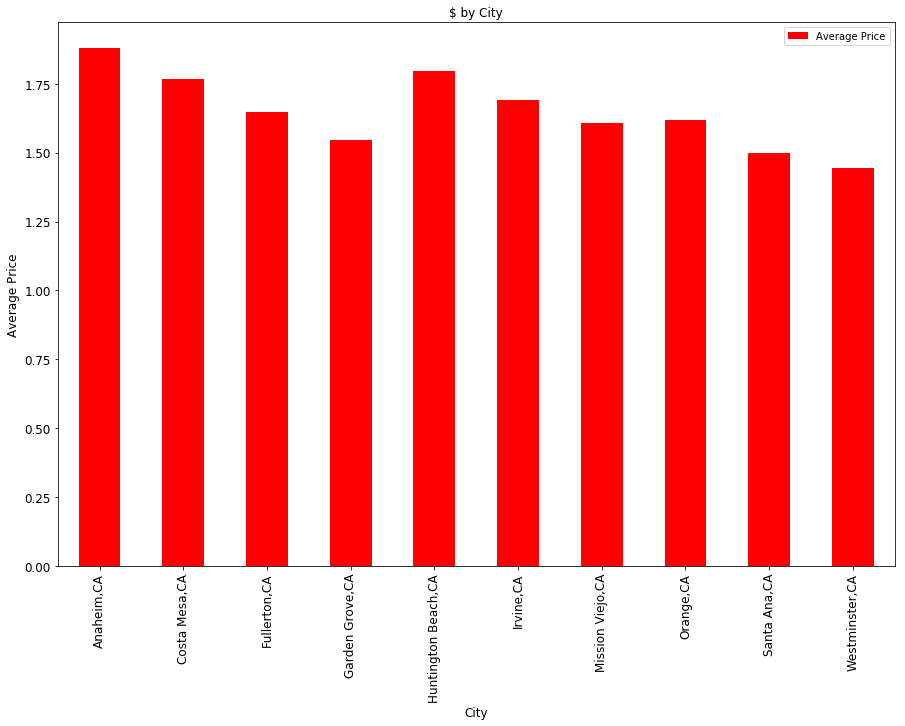

In [23]:

ax = df.plot(kind='bar', title ="$ by City",figsize=(15,10),x='City',y='Average Price',legend=True, fontsize=12, color="r")
ax.set_xlabel("City",fontsize=12)
ax.set_ylabel("Average Price",fontsize=12)

'Average Price'

TypeError: _sum() got an unexpected keyword argument 'numeric_only'